# **Regressors**
Let's Boost Our Knowledge with Regression Problems and be Ready for All of it,


# Important Note :-
While dealing with vectors  [ 1D Array ] =  1 Feature  or 1 Label
Some functions such as fitting and transforming would require the input to be reshaped , try to just add a line  for this  when you want to reshape `X`
you just type  :-
`X= X.reshape(-1,1)  `

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/E2Edata')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **First**   : Come and Have A look on a Comparison Between Polynomial Regression and Linear Regression


R squared of Linear Regression : 0.9569566641435086
R squared of Polynomial Regression : 0.9665546834956733


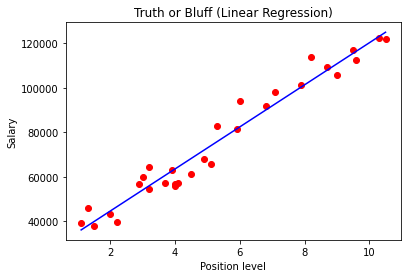

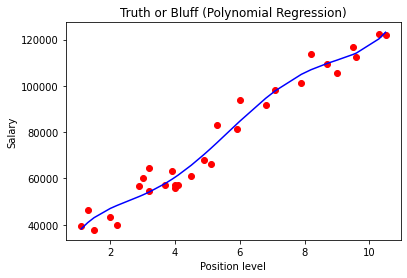

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Importing the dataset
df= pd.read_csv('Salary_Data.csv')
X= df.iloc[:,0].values
y=df.iloc[:,1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 , shuffle= False)
'''
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
'''

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

#Evaluation
from sklearn.metrics import r2_score
Er1=r2_score(y,lin_reg.predict(X))
Er2=r2_score(y,lin_reg_2.predict(poly_reg.fit_transform(X)))
print('R squared of Linear Regression :', Er1)
print('R squared of Polynomial Regression :', Er2)

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



# Explanation
Let's Explore The code of Polynomial Regression  in more Details

Polynomial Regression works by  Transforming the Current Features into Polynomial Features
In Our Case we only have 1  Feature and we do want to convert it for example to 10 Poly Features  let's see how can we do this and how would they look like

In [ ]:
pd.DataFrame(X).head(5)  # Let's have a look on Our X
# I've Chose to visualize it as a data frame cause The Array is currently  look like [ [1.1],[1.3],[1.5],... ] which is not the best way to see

,0
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
from sklearn.preprocessing   import PolynomialFeatures
#Instantiate
poly=PolynomialFeatures(degree=20) # Number of Degree is Hyperparameter so you can try it till you get the Best Results
Poly_X= poly.fit_transform(X)

# What is the PolyFeatures ?

The Poly Features is a Matrix Generated from  Our Actual Features which is X_train

Poly Features Size is equal to ( Number of Rows , The Degree of the Polynomial)
The  Rows indicates the Data Rows
The Columns indicates the Polynomial Features which is Generated from our Column

So we can tell that our Column Got Transformed into abig Matrix.



In [ ]:
# Let's See Now the Poly features  of Array X
pd.DataFrame(Poly_X).head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.1,1.21,1.331,1.4641,1.61051,1.771561,1.948717,2.143589,2.357948,...,2.853117,3.138428,3.452271,3.797498,4.177248,4.594973,5.054470,5.559917e+00,6.115909e+00,6.727500e+00
1,1.0,1.3,1.69,2.197,2.8561,3.71293,4.826809,6.274852,8.157307,10.604499,...,17.921604,23.298085,30.287511,39.373764,51.185893,66.541661,86.504159,1.124554e+02,1.461920e+02,1.900496e+02
2,1.0,1.5,2.25,3.375,5.0625,7.59375,11.390625,17.085938,25.628906,38.443359,...,86.497559,129.746338,194.619507,291.929260,437.893890,656.840836,985.261253,1.477892e+03,2.216838e+03,3.325257e+03
3,1.0,2.0,4.00,8.000,16.0000,32.00000,64.000000,128.000000,256.000000,512.000000,...,2048.000000,4096.000000,8192.000000,16384.000000,32768.000000,65536.000000,131072.000000,2.621440e+05,5.242880e+05,1.048576e+06
4,1.0,2.2,4.84,10.648,23.4256,51.53632,113.379904,249.435789,548.758735,1207.269218,...,5843.183014,12855.002631,28281.005788,62218.212734,136880.068015,301136.149634,662499.529195,1.457499e+06,3.206498e+06,7.054295e+06


# Explanation
So we can tell that " Polynomial Features " Is some how a way of Transformation for the Features but thats not  a Model yet ,  you need to Build a model to get fit on this  which can be basically a linear Regression

To fit a **Linear Regression** Model to **Normal Features** we use :-


```
LinReg.fit(X_train, y_train)
LinReg.predict(X_test)
```




and To Fit a **Linear regression** Model to **Poly features** we type it like this

```
LinReg.fit(poly.fit_transform(X_train), y_train)
LinReg.predict(poly.transform(X_test))
```





# Regularization Techniques  
It is about Putting a Penality Term to the Model


*   Ridge =RSS + Alpha* Squared (Slope)
*   Lasso = RSS+ Alpha *Abs(Slope)

# Ridge Regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.23047e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


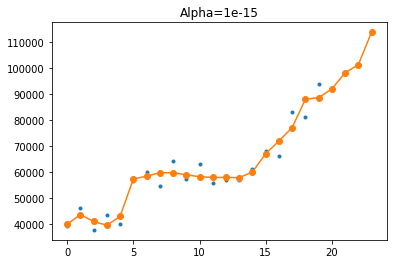

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


------------------


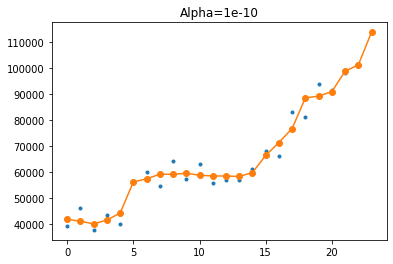

------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


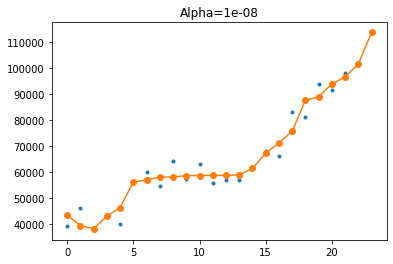

------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


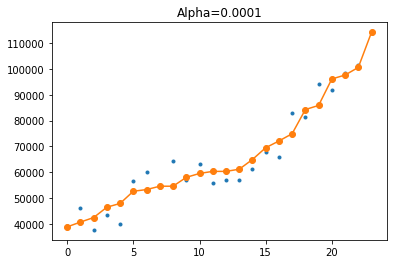

------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


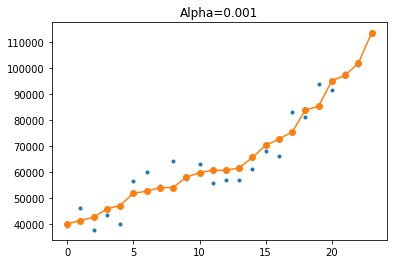

------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


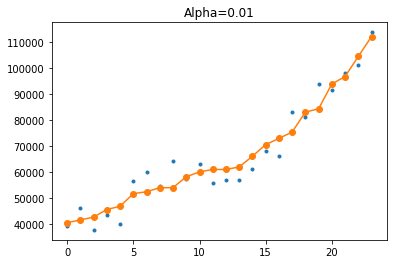

------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


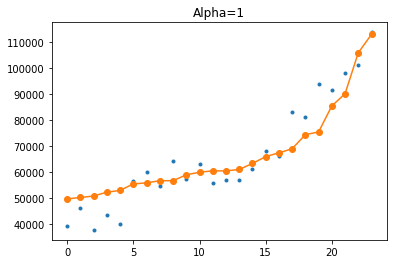

------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


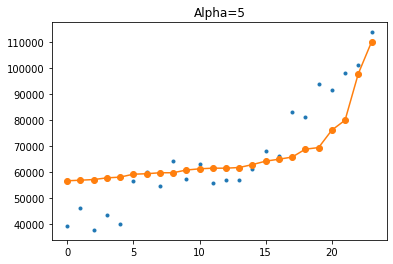

------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


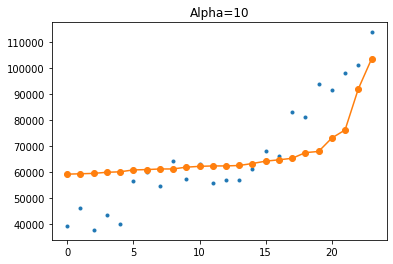

------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


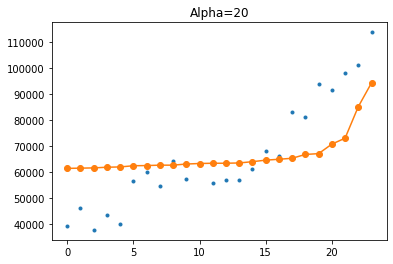

------------------


In [ ]:
for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(poly.fit_transform(X_train), y_train)
    plt.title('Alpha=%s' %alpha)
    plt.plot(y_train ,'.', ridge.predict(poly.fit_transform(X_train)),'-o')
    plt.show()
    print('------------------')

# Lasso Regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+08, tolerance: 1.

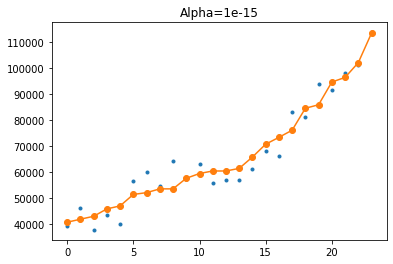

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+08, tolerance: 1.

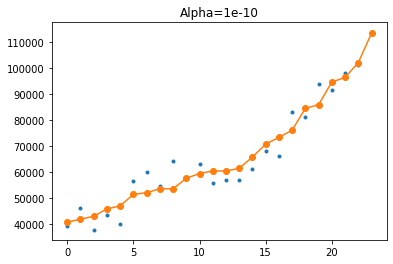

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+08, tolerance: 1.

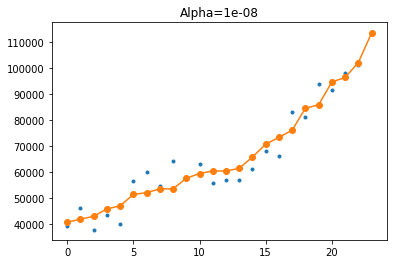

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+08, tolerance: 1.

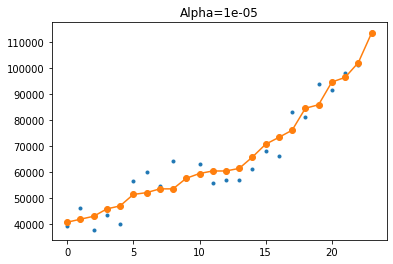

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+08, tolerance: 1.

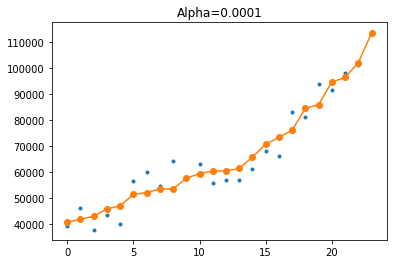

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.011e+08, tolerance: 1.

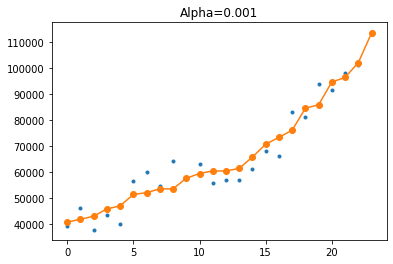

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.997e+08, tolerance: 1.

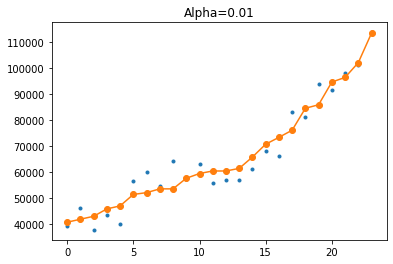

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.399e+08, tolerance: 1.

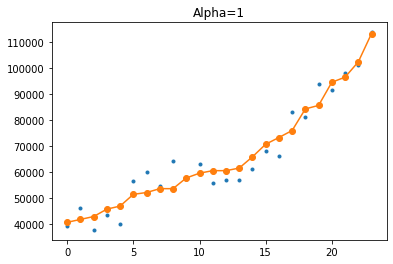

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+07, tolerance: 1.

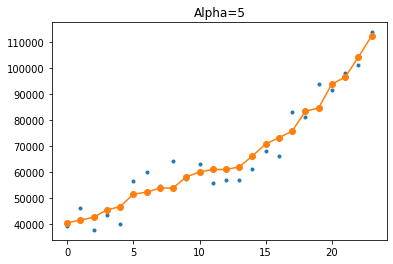

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


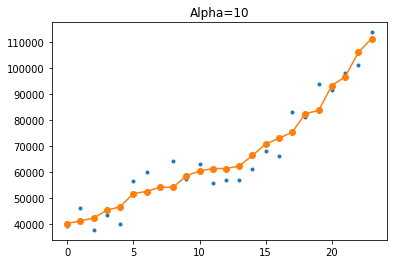

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


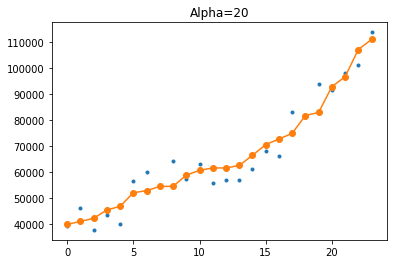

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


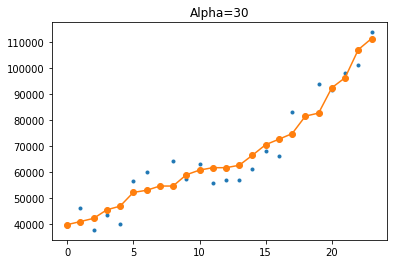

----------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


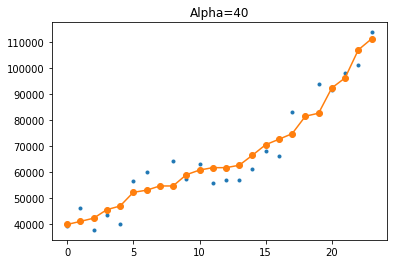

----------------------------------------------------------


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,6984.043178,-747.874198,104.396552,13.963379,0.800985,-0.012366,-0.009784,-0.001582,-0.000189,...,-1.703482e-06,-1.279671e-07,-6.703315e-09,1.143168e-10,1.077011e-10,2.232512e-11,3.606783e-12,5.236586e-13,7.169590e-14,9.464981e-15
1,0.0,6984.043178,-747.874198,104.396552,13.963379,0.800985,-0.012366,-0.009784,-0.001582,-0.000189,...,-1.703482e-06,-1.279671e-07,-6.703315e-09,1.143168e-10,1.077011e-10,2.232512e-11,3.606783e-12,5.236586e-13,7.169590e-14,9.464981e-15
2,0.0,6984.043174,-747.874196,104.396551,13.963379,0.800985,-0.012366,-0.009784,-0.001582,-0.000189,...,-1.703482e-06,-1.279671e-07,-6.703315e-09,1.143167e-10,1.077011e-10,2.232512e-11,3.606783e-12,5.236586e-13,7.169590e-14,9.464981e-15
3,0.0,6984.039358,-747.871553,104.396169,13.963357,0.800985,-0.012365,-0.009784,-0.001582,-0.000189,...,-1.703479e-06,-1.279667e-07,-6.703339e-09,1.142626e-10,1.077018e-10,2.232520e-11,3.606792e-12,5.236596e-13,7.169602e-14,9.464995e-15
4,0.0,6984.004963,-747.847744,104.392721,13.963161,0.800989,-0.012358,-0.009784,-0.001582,-0.000189,...,-1.703454e-06,-1.279634e-07,-6.703543e-09,1.137746e-10,1.077080e-10,2.232593e-11,3.606876e-12,5.236692e-13,7.169711e-14,9.465120e-15
5,0.0,6983.660864,-747.609625,104.358249,13.961204,0.801026,-0.012290,-0.009784,-0.001582,-0.000189,...,-1.703200e-06,-1.279306e-07,-6.705536e-09,1.088879e-10,1.077705e-10,2.233319e-11,3.607712e-12,5.237650e-13,7.170803e-14,9.466362e-15
6,0.0,6980.191495,-745.223226,104.013810,13.941626,0.801377,-0.011605,-0.009792,-0.001582,-0.000189,...,-1.700670e-06,-1.276027e-07,-6.718736e-09,5.920111e-11,1.083965e-10,2.240601e-11,3.616104e-12,5.247262e-13,7.181770e-14,9.478847e-15
7,0.0,6108.354321,-395.019318,73.003491,11.767642,0.636427,0.006542,-0.003142,-0.001693,-0.000190,...,-1.490164e-06,-9.416897e-08,-2.350827e-09,-0.000000e+00,-0.000000e+00,-0.000000e+00,4.396276e-13,6.750169e-13,8.981593e-14,1.162322e-14
8,0.0,4359.934867,181.616722,71.266501,2.962330,0.000000,0.000000,-0.000000,-0.000000,-0.000127,...,-9.445640e-07,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.745627e-14
9,0.0,3495.175502,669.670930,18.233379,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-2.102417e-09,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.068273e-15


In [ ]:
coeff_matrix = []
for alpha in [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]:
    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha = alpha, normalize=True)
    lasso.fit(poly.fit_transform(X_train), y_train)
    coeff_matrix.append(lasso.coef_)
    plt.title('Alpha=%s'%alpha)  # Do YOU REMEMBER THIS SYNTAX  :D
    plt.plot(y_train ,'.', lasso.predict(poly.fit_transform(X_train)),'-o'  )
    plt.show()
    print('----------------------------------------------------------')
pd.DataFrame(coeff_matrix)

# Let's Say you 've Liked Alpha =1 for Lasso For Example Let's See how to select it and use it

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.399e+08, tolerance: 1.

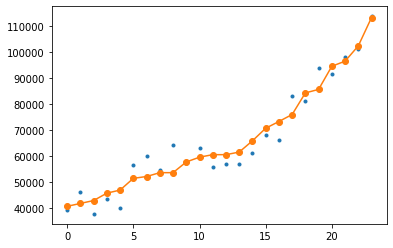

In [ ]:
# Select Best  Alpha
lasso = Lasso(alpha = 1, normalize=True)
lasso.fit(poly.fit_transform(X_train),y_train)
plt.plot(y_train, '.',lasso.predict(poly.fit_transform(X_train)),'-o')
plt.show()

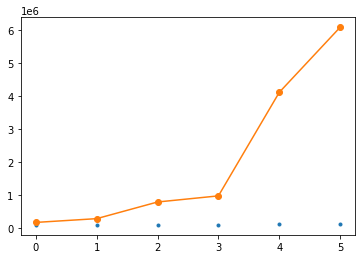

In [ ]:
plt.plot(y_test, '.',lasso.predict(poly.transform(X_test)),'-o')

In [ ]:
#You can always check the performance of the whole Model by using R Squared
lasso.fit(poly.fit_transform(X),y)
preds=lasso.predict(poly.fit_transform(X))
R2=r2_score(y,preds)
R2

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.896e+07, tolerance: 2.

0.9656364000658936

# **DO NOT**  COPY AND PASTE ANYTHING
# **TYPE WITH YOUR OWN FINGERS**
you are always allowed to have a look up to remember the Syntax


I Do Really Enourage you to Restart Kernel  and not Run anything from the Above Cells  so no variables would be taken already or hold a false value


### Goal of this Task  is to  Use all The Regression Models we 've learnt so  far  but in a way that make us Get the Best of Everything.

Feel Free to use any Data file or You can use `Salary Data`  No worries , it will work with all


Try to  Follow the Steps !

**First** : If You are on Colab Right now  Get your Authentication Key

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/E2Edata')  # Fix This if your file is in a Certain Directory in Your Drive

Mounted at /content/drive/


**Second** :


1.   Load The Data File
2.   Split Features and Labels
3.   Reshape Features for later Usage





In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('Salary_Data.csv')
X= df.iloc[:,0].values
y= df.iloc[:,1].values
X= X.reshape(-1,1)   # RESHAPED

**Third** :


1.   Split training and Testing Data
2.   Stop the shuffle  for a good Visualization
3.   Fix the Seed to a Constant Number





In [ ]:
from  sklearn.model_selection  import train_test_split
X_train,X_test,y_train , y_test = train_test_split(X,y , test_size =0.3 , shuffle=False , random_state=0  )

**Forth** :


1.   Instantiate The Linear Regression Model
2.   Fit the Model to Training Set
3.   Predict The Testing Set
4.   Evaluate the Model by  R squared method between Preds and Actual Values
5.   Visualize The Model in a Good way

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#Fit the Model to Training Set
lr.fit(X_train,y_train)
#Predict The Testing Set
lr_preds=lr.predict(X_test)
#Evaluate the Model by R squared method between Preds and Actual Valuees
from sklearn.metrics import r2_score
r2_score(y_test , lr_preds)


0.6310218638793474

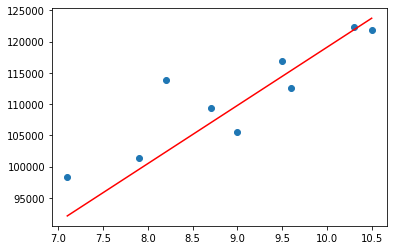

In [ ]:
plt.scatter(X_test ,y_test)
plt.plot(X_test, lr_preds , color = 'red' )

**Fifth** :


1.   Instantiate The Poly Features with  Degree = 7
2.   Fit and Transform the Training Features into Poly Training Features
3.   Fit the Linear Regression Model to the Poly Training Features and Actual Training Label
4.   Transfrom The Testing Features into Poly Testing Features
5.   Predict The Poly Testing Features
6.   Evaluate the Model by  R squared method between Preds and Actual Values
7.   Visualize The Model in a Good way











In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#Fit and Transform the Training Features into Poly Training Features
poly=PolynomialFeatures(degree = 7)
x_poly=poly.fit_transform(X_train)
x_poly.shape
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(X_test)
x_poly_test.shape

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_poly = sc.fit_transform(x_poly)
x_poly_test= sc.transform(x_poly_test)

#Fit the Model to Training Set
lp=LinearRegression()
lp.fit(x_poly,y_train)
#Predict The Testing Set
lp_preds=lp.predict(x_poly_test)
#Evaluate the Model by R squared method between Preds and Actual Valuees
r2_score(y_test , lp_preds)

-13835811.225999936

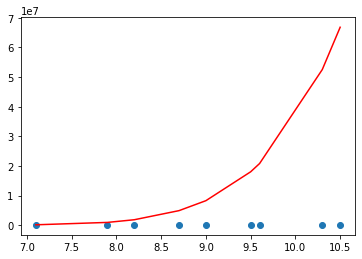

In [ ]:
plt.scatter(X_test ,y_test)
plt.plot(X_test, lp_preds , color = 'red' )

**Sixth**: Make The Fifth Step more Powerful!


Build a Code that Try 20 Degrees like from  Degree 1 to 21
And Return The Best Degree with the Highest R Squared Value

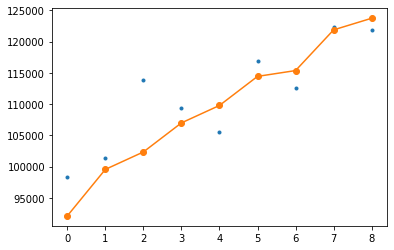

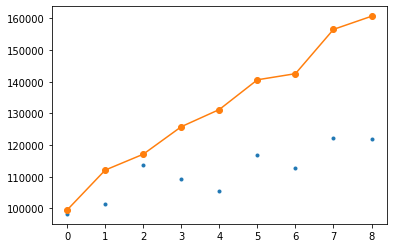

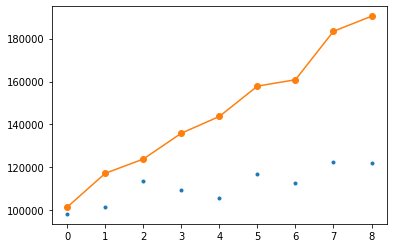

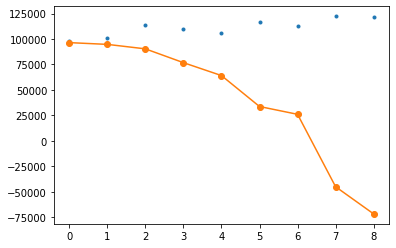

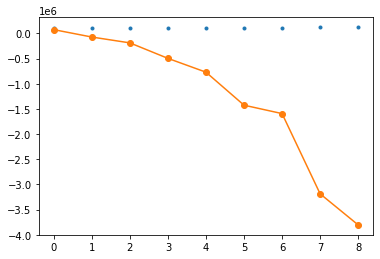

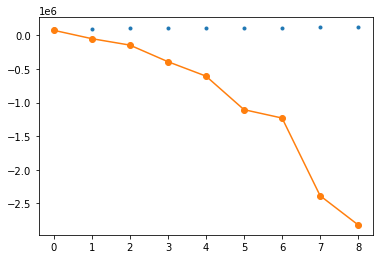

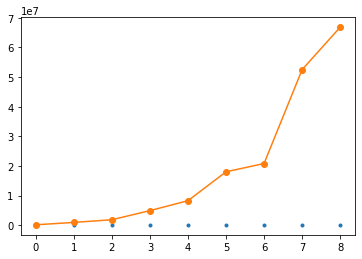

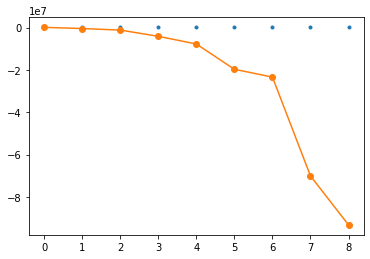

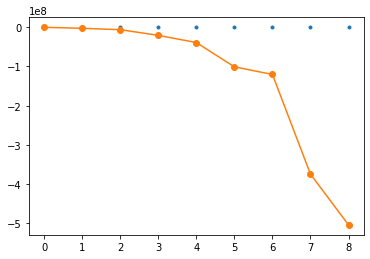

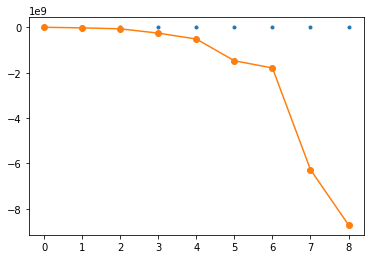

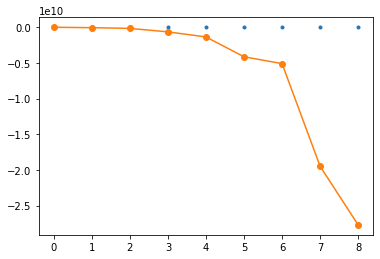

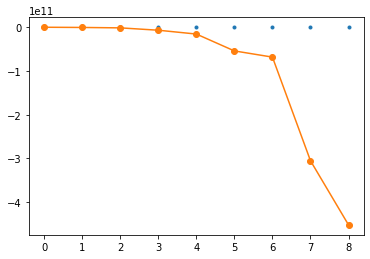

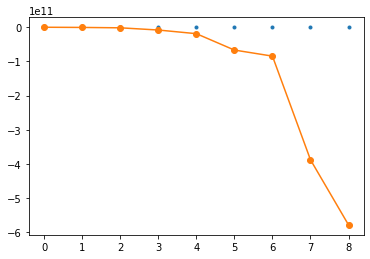

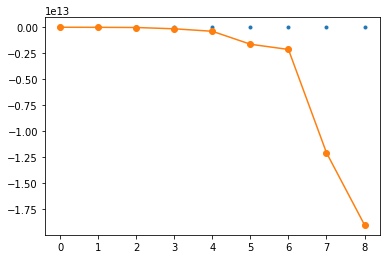

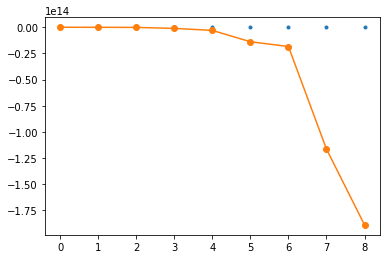

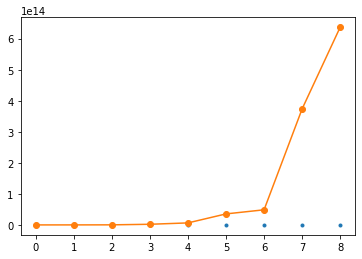

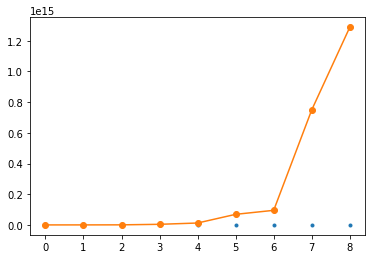

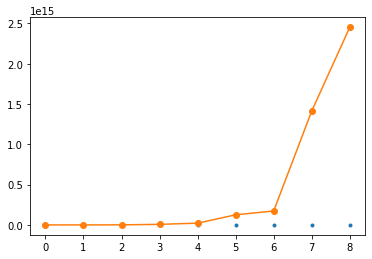

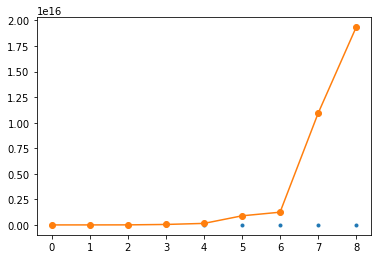

the best degree is 1


In [ ]:
RSS=[]
for deg in range(1,20):
    from sklearn.preprocessing import PolynomialFeatures
    #Fit and Transform the Training Features into Poly Training Features
    poly=PolynomialFeatures(degree = deg)
    x_poly=poly.fit_transform(X_train)
    #Transfrom The Testing Features into Poly Testing Feature
    x_poly_test=poly.transform(X_test)
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_poly = sc.fit_transform(x_poly)
    x_poly_test= sc.transform(x_poly_test)
    #Fit the Model to Training Set
    lp=LinearRegression()
    lp.fit(x_poly,y_train)
    #Predict The Testing Set
    lp_preds=lp.predict(x_poly_test)
    #Evaluate the Model by R squared method between Preds and Actual Valuees
    r2=r2_score(y_test , lp_preds)
    RSS.append(r2)
    #plt.scatter(X_test ,y_test)
    #plt.plot(X_test, lp_preds , color = 'red' )
    plt.plot(y_test ,'.', lp_preds,'-o')
    plt.show()
#The Best Degree with the Highest R Squared Value
max_value = max(RSS)
index = RSS.index(max(RSS))
print('the best degree is' , index+1 )

In [ ]:
RSS

[0.6310218638793474,
 -7.91294002759677,
 -24.716589506015406,
 -142.5135092613212,
 -56665.720385602195,
 -32858.00717815009,
 -13835811.225999936,
 -25284985.77664766,
 -725604705.9775021,
 -208090415665.36826,
 -2056009612569.5786,
 -525873119244014.7,
 -856230303796823.4,
 -8.839038504862789e+17,
 -8.5790480050651e+19,
 -9.447503852045343e+20,
 -3.8452280205497037e+21,
 -1.3879957096519359e+22,
 -8.528279415272088e+23]

In [ ]:
#The Best Degree with the Highest R Squared Value
max_value = max(RSS)
index = RSS.index(max(RSS))
print('the best degree is' , index+1 )

the best degree is 1


**Seventh** :


1.   Instantiate The Ridge Regressor with  Alpha = 1
2.   Fit and Transform the Training Features into Poly Training Features
3.   Fit the Ridge Model to the Poly Training Features and Actual Training Label
4.   Transfrom The Testing Features into Poly Testing Features
5.   Predict The Poly Testing Features
6.   Evaluate the Model by  R squared method between Preds and Actual Values
7.   Visualize The Model in a Good way

R squared is = 0.8788303644817652


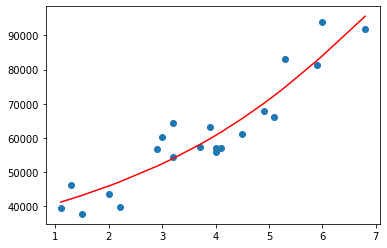

In [ ]:
from sklearn.linear_model import Ridge
#Fit and Transform the Training Features into Poly Training Features
poly=PolynomialFeatures(degree = 7)
x_poly=poly.fit_transform(X_train)
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(X_test)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_poly = sc.fit_transform(x_poly)
x_poly_test= sc.transform(x_poly_test)
#Fit the Model to Training Set
rg=Ridge(alpha= 1)
rg.fit(x_poly,y_train)
#Predict The Testing Set
rg_preds=rg.predict(x_poly)
#Evaluate the Model by R squared method between Preds and Actual Valuees
r2=r2_score(y_train, rg_preds)
print('R squared is =', r2)
plt.scatter(X_train ,y_train)
plt.plot(X_train, rg_preds , color = 'red' )
plt.show()

**Eighth**
Set Range Of Alphas and Make A function to Select the Best One with resepct to R Squared Metric

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.0619e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


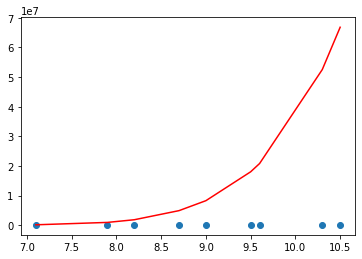

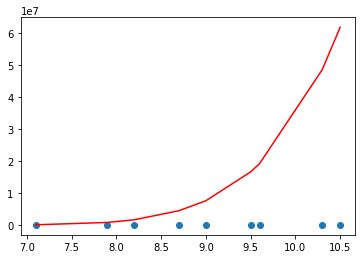

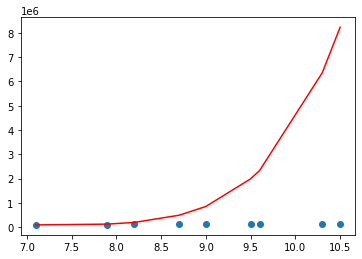

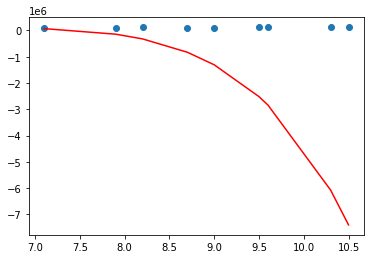

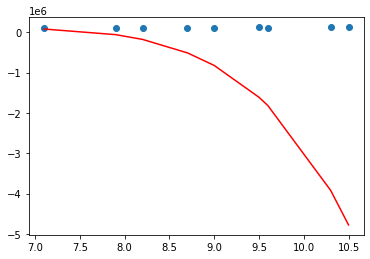

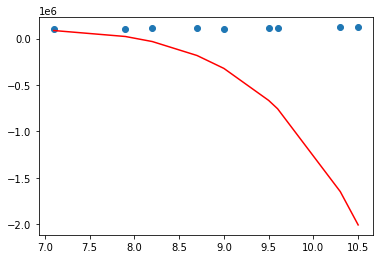

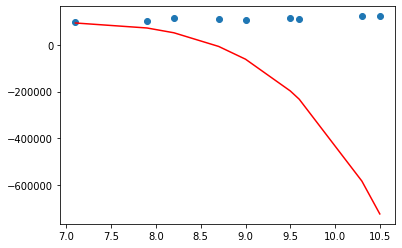

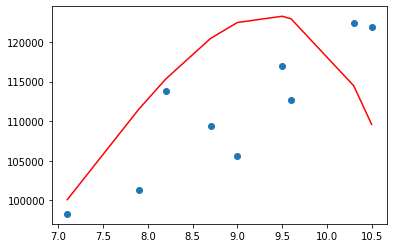

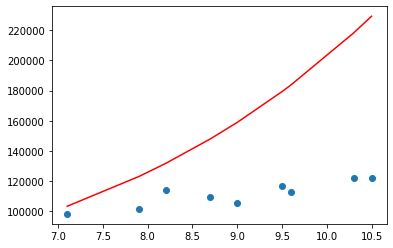

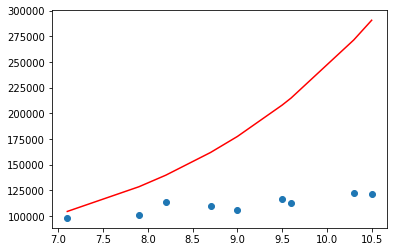

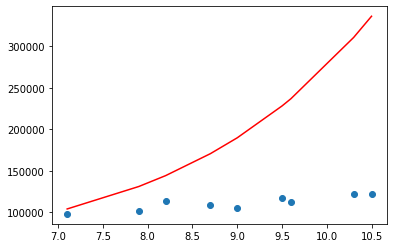

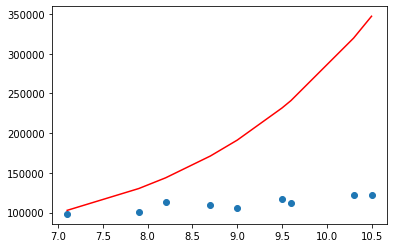

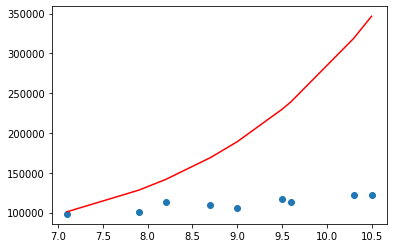

the best alpha is 1


In [ ]:
RS=[]
alpha=[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]
for alp in alpha:
    #Fit and Transform the Training Features into Poly Training Features
    poly=PolynomialFeatures(degree = 7)
    x_poly=poly.fit_transform(X_train)
    #Transfrom The Testing Features into Poly Testing Feature
    x_poly_test=poly.transform(X_test)
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_poly = sc.fit_transform(x_poly)
    x_poly_test= sc.transform(x_poly_test)
    #Fit the Model to Training Set
    rg=Ridge(alpha= alp)
    rg.fit(x_poly,y_train)
    #Predict The Testing Set
    rg_preds=rg.predict(x_poly_test)
    #Evaluate the Model by R squared method between Preds and Actual Valuees
    r2=r2_score(y_test , rg_preds)
    RS.append(r2)
    plt.scatter(X_test ,y_test)
    plt.plot(X_test, rg_preds , color = 'red' )
    plt.show()
#The Best Degree with the Highest R Squared Value
max_value = max(RS)
index = RS.index(max(RS))
print('the best alpha is' , alpha[index] )

**Ninth** :


1.   Instantiate The Lasso Regressor with  Alpha = 1
2.   Fit and Transform the Training Features into Poly Training Features
3.   Fit the Lasso Model to the Poly Training Features and Actual Training Label
4.   Transfrom The Testing Features into Poly Testing Features
5.   Predict The Poly Testing Features
6.   Evaluate the Model by  R squared method between Preds and Actual Values
7.   Visualize The Model in a Good way












R squared is = 0.6308916046351001


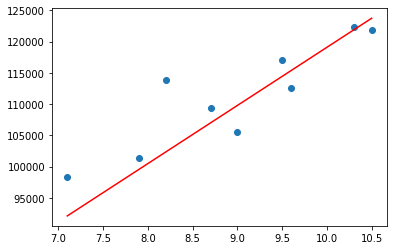

In [ ]:
from sklearn.linear_model import Lasso
#Fit and Transform the Training Features into Poly Training Features
poly=PolynomialFeatures(degree = 1)
x_poly=poly.fit_transform(X_train)
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(X_test)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_poly = sc.fit_transform(x_poly)
x_poly_test= sc.transform(x_poly_test)
#Fit the Model to Training Set
la=Lasso(alpha= 1)
la.fit(x_poly,y_train)
#Predict The Testing Set
la_preds=la.predict(x_poly_test)
#Evaluate the Model by R squared method between Preds and Actual Valuees
r2=r2_score(y_test , la_preds)
print('R squared is =', r2)
plt.scatter(X_test ,y_test)
plt.plot(X_test, la_preds , color = 'red' )
plt.show()

**Tenth**
- Set Range Of Alphas and Make A function to Select the Best One with resepct to R Squared Metric
- Print Out How many Features has been Selected

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.684e+08, tolerance: 5.138e+05
  model = cd_fast.enet_coordinate_descent(


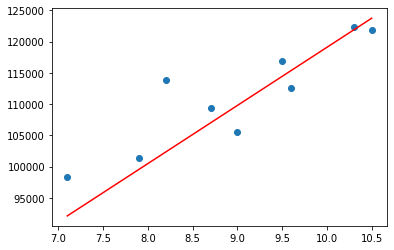

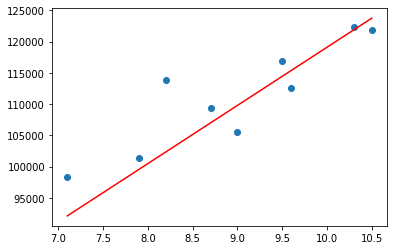

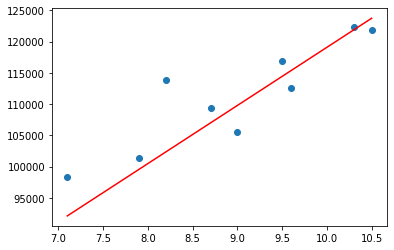

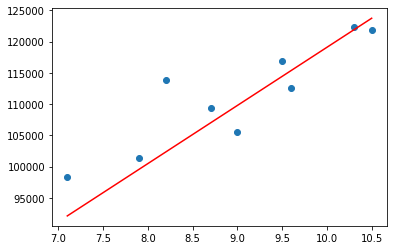

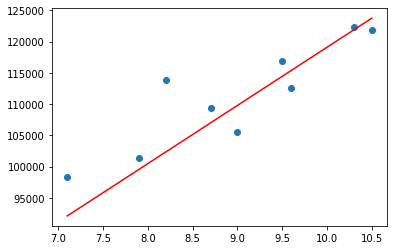

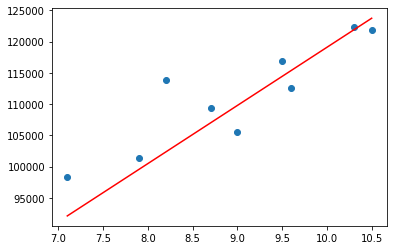

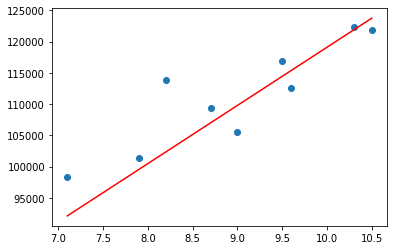

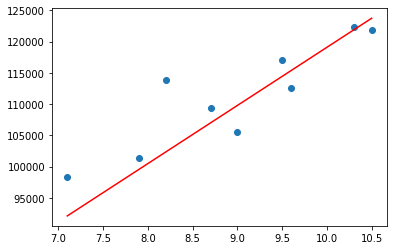

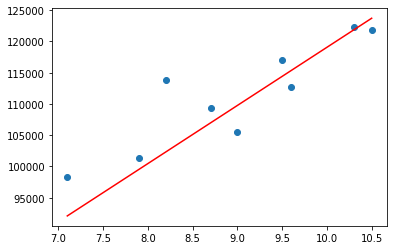

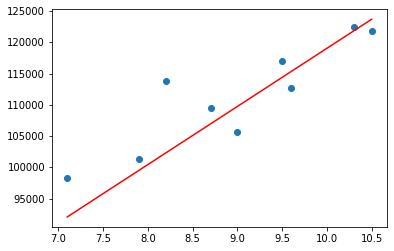

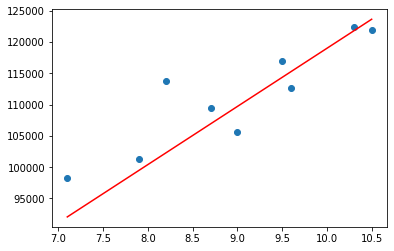

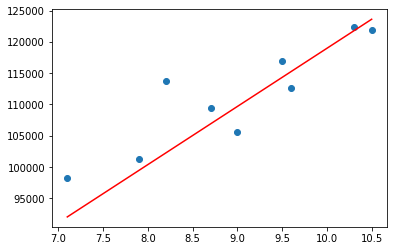

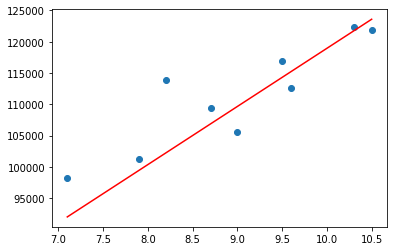

the best alpha is 1e-15


In [ ]:
las=[]
coeff_matrix=[]
alpha=[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]
for alp in alpha:
    #Fit and Transform the Training Features into Poly Training Features
    poly=PolynomialFeatures(degree = 1)
    x_poly=poly.fit_transform(X_train)
    #Transfrom The Testing Features into Poly Testing Feature
    x_poly_test=poly.transform(X_test)
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_poly = sc.fit_transform(x_poly)
    x_poly_test= sc.transform(x_poly_test)
    #Fit the Model to Training Set
    la=Lasso(alpha= alp)
    la.fit(x_poly,y_train)
    coeff_matrix.append(la.coef_)
    #Predict The Testing Set
    la_preds=la.predict(x_poly_test)
    #Evaluate the Model by R squared method between Preds and Actual Valuees
    r2=r2_score(y_test , la_preds)
    las.append(r2)
    plt.scatter(X_test ,y_test)
    plt.plot(X_test, la_preds , color = 'red' )
    plt.show()
#The Best Degree with the Highest R Squared Value
max_value = max(las)
index = las.index(max(las))
print('the best alpha is' , alpha[index] )

In [ ]:
pd.DataFrame(coeff_matrix[index])

,0
0,0.000000
1,14476.922896


**Eleventh**

Here We come to the Final Step
Make ONE BIG Function that when you call it would try all of the Regressors then Return the Name of the Regressor With the Highest R Squared

In [ ]:
def Regresssors(x,y,split,degree , alpha):
  from  sklearn.model_selection  import train_test_split
  x_train,x_test,y_train , y_test = train_test_split(x,y , test_size =split, shuffle=False , random_state=0 )
  #Fit and Transform the Training Features into Poly Training Features
  poly=PolynomialFeatures(degree = degree)
  x_poly=poly.fit_transform(x_train)
  #Transfrom The Testing Features into Poly Testing Feature
  x_poly_test=poly.transform(x_test)
  # Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  x_poly = sc.fit_transform(x_poly)
  x_poly_test= sc.transform(x_poly_test)

  RSS=[]
  from sklearn.linear_model import LinearRegression
  lr=LinearRegression()
  #Fit the Model to Training Set
  lr.fit(x_train,y_train)
  #Predict The Testing Set
  lr_preds=lr.predict(X_test)
  #Evaluate the Model by R squared method between Preds and Actual Valuees
  r2=r2_score(y_test , lr_preds)
  RSS.append(r2)

  from sklearn.linear_model import Ridge
  #Fit the Model to Training Set
  rg=Ridge(alpha= alpha)
  rg.fit(x_poly,y_train)
  #Predict The Testing Set
  rg_preds=rg.predict(x_poly)
  #Evaluate the Model by R squared method between Preds and Actual Valuees
  r2=r2_score(y_train, rg_preds)
  RSS.append(r2)

  from sklearn.linear_model import Lasso
  #Fit the Model to Training Set
  la=Lasso(alpha= alpha)
  la.fit(x_poly,y_train)
  #Predict The Testing Set
  la_preds=la.predict(x_poly_test)
  #Evaluate the Model by R squared method between Preds and Actual Valuees
  r2=r2_score(y_test , la_preds)
  RSS.append(r2)

  #The Best Degree with the Highest R Squared Value
  max_value = max(RSS)
  index = RSS.index(max(RSS))
  if index == 0:
     print('linear reg is the best ')
     print('R squared is ' , RSS[index])
  elif index ==1:
    print(' Ridga is the best ')
    print('R squared is ' , RSS[index])
  elif index ==2:
    print(' Ridga is the best ')
    print('R squared is ' , RSS[index])


In [ ]:
df=pd.read_csv('Salary_Data.csv')
X= df.iloc[:,0].values
y= df.iloc[:,1].values
x= X.reshape(-1,1)

Regresssors(x,y,0.2,7 , 0.1)

 Ridga is the best 
R squared is  0.9346395406354487


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.183e+08, tolerance: 1.027e+06
  model = cd_fast.enet_coordinate_descent(


# **Great Job**